# Task 3 - Model Explainability

SHAP Analysis for Fraud Detection Model

This notebook performs SHAP (Shapley Additive exPlanations) analysis on the best-performing Random Forest model to interpret key drivers of fraud predictions. It uses preprocessed data from previous tasks and generates Summary and Force plots, along with a text interpretation for the report.
This task focuses on explaining predictions of the best-performing fraud detection model using **SHAP (Shapley Additive Explanations)**. It aims to identify key features influencing fraud classification decisions.

The process includes:
- Training Logistic Regression and Random Forest models on two datasets.
- Evaluating models using classification metrics and visual plots.
- Applying SHAP to interpret feature importance (summary plot) and visualize specific predictions (force plot).
- Saving interactive SHAP visualizations to 
    

In [1]:
# 📦 Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    f1_score, confusion_matrix, precision_recall_curve,
    auc, classification_report
)
from sklearn.preprocessing import StandardScaler
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
# Optional: Set seaborn style
sns.set(style="whitegrid")


In [3]:
def evaluate_model(model, X_test, y_test, dataset_name, model_name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    auc_pr = auc(recall, precision)

    print(f"\n📘 Evaluation Report for {model_name} on {dataset_name}")
    print("F1 Score:", round(f1, 4))
    print("AUC-PR:", round(auc_pr, 4))
    print("Confusion Matrix:\n", cm)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Plot Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name} on {dataset_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plot Precision-Recall Curve
    plt.figure(figsize=(6, 4))
    plt.plot(recall, precision, marker='.', label=f'AUC={auc_pr:.2f}')
    plt.title(f'Precision-Recall Curve - {model_name} on {dataset_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid(True)
    plt.show()

    return {"f1": f1, "auc_pr": auc_pr, "confusion_matrix": cm}


In [4]:
# Assume you've already loaded:
creditcard = pd.read_csv('F:/Detection-of-fraud-cases-for-e-commerce-and-bank-transactions/data/raw/creditcard.csv')
Fraud_Data = pd.read_csv('F:/Detection-of-fraud-cases-for-e-commerce-and-bank-transactions/data/transformed_features.csv')

# Split CreditCard
X_cc = creditcard.drop(columns=['Class'])
y_cc = creditcard['Class']
X_cc_train, X_cc_test, y_cc_train, y_cc_test = train_test_split(
    X_cc, y_cc, test_size=0.2, stratify=y_cc, random_state=42)

# Split Fraud_Data
X_fd = Fraud_Data
y_fd = pd.read_csv('F:/Detection-of-fraud-cases-for-e-commerce-and-bank-transactions/data/target_labels.csv')
X_fd_train, X_fd_test, y_fd_train, y_fd_test = train_test_split(
    X_fd, y_fd, test_size=0.2, stratify=y_fd, random_state=42)


In [5]:
scaler_cc = StandardScaler()
X_cc_train_scaled = scaler_cc.fit_transform(X_cc_train)
X_cc_test_scaled = scaler_cc.transform(X_cc_test)

scaler_fd = StandardScaler()
X_fd_train_scaled = scaler_fd.fit_transform(X_fd_train)
X_fd_test_scaled = scaler_fd.transform(X_fd_test)



📘 Evaluation Report for Logistic Regression on CreditCard
F1 Score: 0.1144
AUC-PR: 0.7639
Confusion Matrix:
 [[55478  1386]
 [    8    90]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



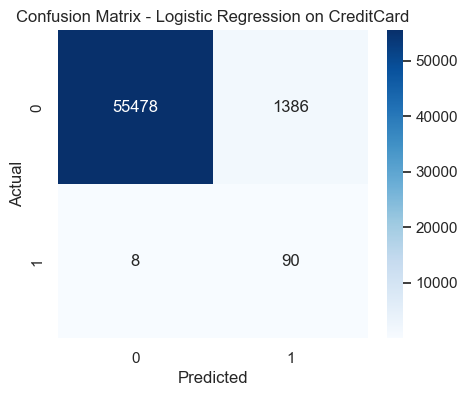

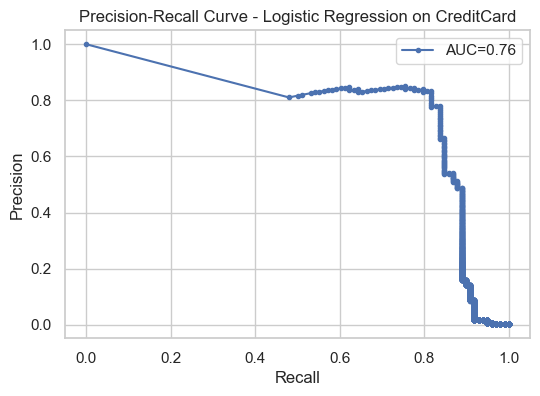


📘 Evaluation Report for Random Forest on CreditCard
F1 Score: 0.8391
AUC-PR: 0.8591
Confusion Matrix:
 [[56861     3]
 [   25    73]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



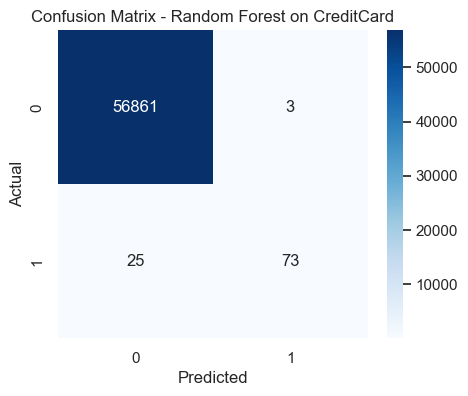

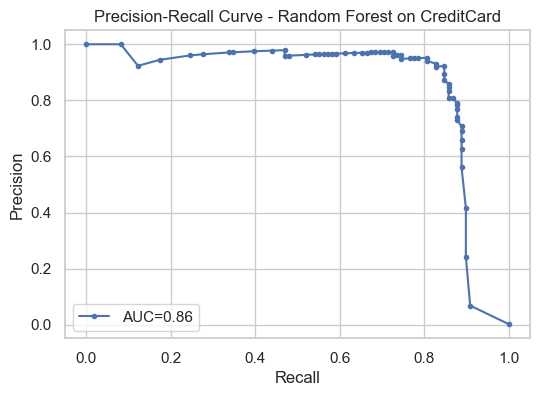

{'f1': 0.8390804597701149,
 'auc_pr': np.float64(0.8591141327761002),
 'confusion_matrix': array([[56861,     3],
        [   25,    73]])}

In [6]:
 #🚀 CREDITCARD DATASET#
# Logistic Regression
lr_cc = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr_cc.fit(X_cc_train_scaled, y_cc_train)
evaluate_model(lr_cc, X_cc_test_scaled, y_cc_test, 'CreditCard', 'Logistic Regression')

# Random Forest
rf_cc = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_cc.fit(X_cc_train, y_cc_train)
evaluate_model(rf_cc, X_cc_test, y_cc_test, 'CreditCard', 'Random Forest')


f:\Detection-of-fraud-cases-for-e-commerce-and-bank-transactions\week8\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



📘 Evaluation Report for Logistic Regression on Fraud_Data
F1 Score: 0.6858
AUC-PR: 0.8029
Confusion Matrix:
 [[17719  9674]
 [ 8050 19342]]

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.65      0.67     27393
           1       0.67      0.71      0.69     27392

    accuracy                           0.68     54785
   macro avg       0.68      0.68      0.68     54785
weighted avg       0.68      0.68      0.68     54785



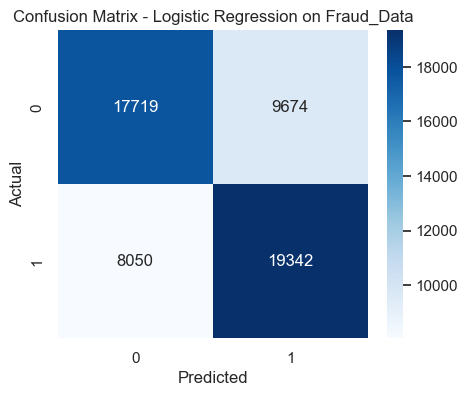

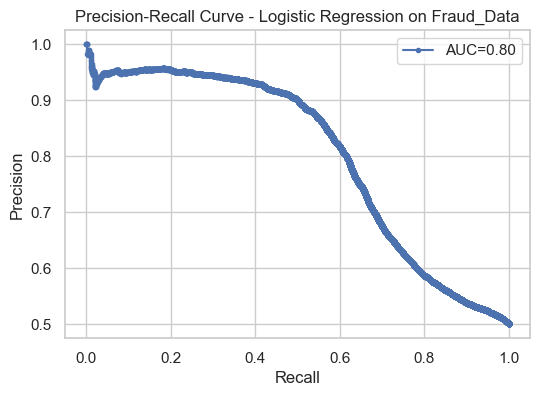

f:\Detection-of-fraud-cases-for-e-commerce-and-bank-transactions\week8\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



📘 Evaluation Report for Random Forest on Fraud_Data
F1 Score: 0.9422
AUC-PR: 0.988
Confusion Matrix:
 [[26615   778]
 [ 2302 25090]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     27393
           1       0.97      0.92      0.94     27392

    accuracy                           0.94     54785
   macro avg       0.95      0.94      0.94     54785
weighted avg       0.95      0.94      0.94     54785



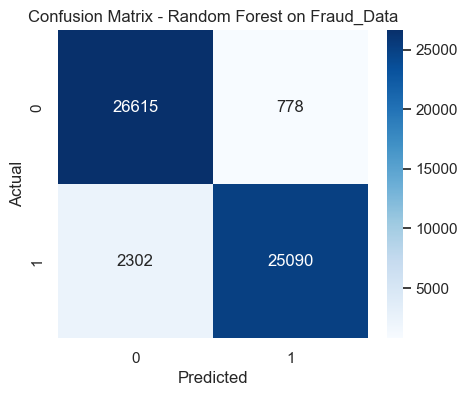

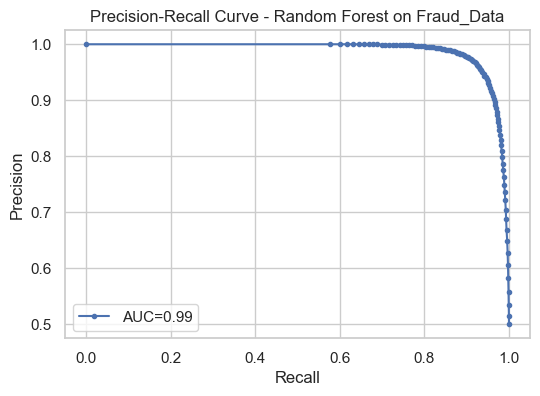

{'f1': 0.9421704844160721,
 'auc_pr': np.float64(0.9879961436693061),
 'confusion_matrix': array([[26615,   778],
        [ 2302, 25090]])}

In [7]:
# 🚀 FRAUD DATASET
# Logistic Regression
lr_fd = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr_fd.fit(X_fd_train_scaled, y_fd_train)
evaluate_model(lr_fd, X_fd_test_scaled, y_fd_test, 'Fraud_Data', 'Logistic Regression')

# Random Forest
rf_fd = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_fd.fit(X_fd_train, y_fd_train)
evaluate_model(rf_fd, X_fd_test, y_fd_test, 'Fraud_Data', 'Random Forest')


In [8]:
import shap

In [9]:
# to shape anaysis shape
# Take a safe-sized sample (e.g., 100 rows)
X_sample = X_fd_test.sample(n=100, random_state=42)


In [10]:
explainer = shap.TreeExplainer(rf_fd)

# Sample with correct shape and dtype
X_sample = X_fd_test[X_fd_train.columns].sample(n=100, random_state=42)
X_sample = X_sample.astype(X_fd_train.dtypes.to_dict())

# Compute SHAP values
shap_values = explainer.shap_values(X_sample, check_additivity=False)


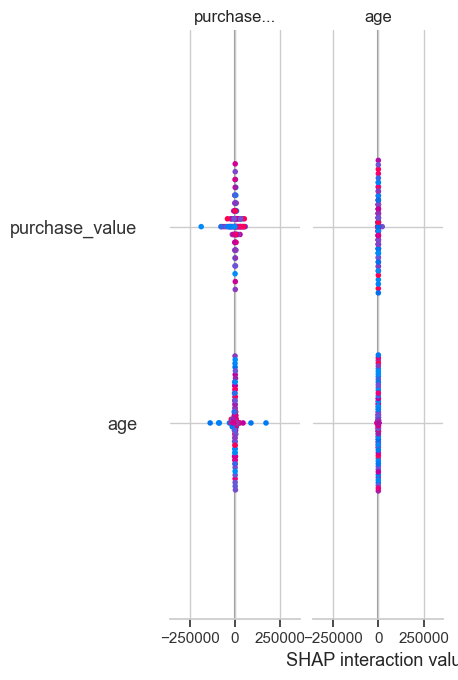

In [11]:

# Detect and plot correctly
if isinstance(shap_values, list) and len(shap_values) == 2:
    shap.summary_plot(shap_values[1], X_sample, plot_type="bar")
else:
    shap.summary_plot(shap_values, X_sample, plot_type="bar")

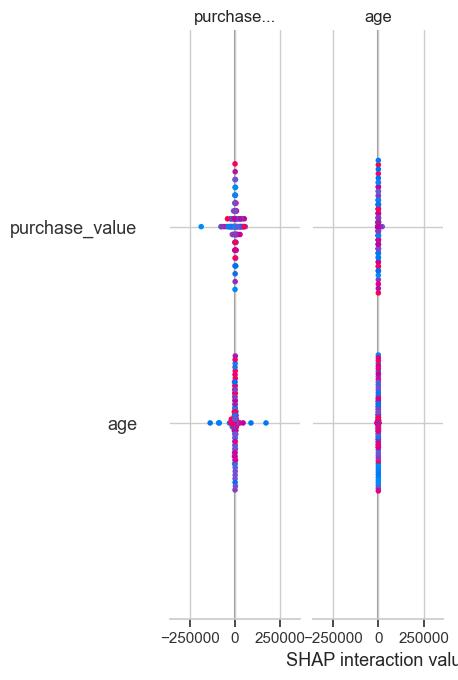

In [17]:

# Detect and plot correctly
if isinstance(shap_values, list) and len(shap_values) == 2:
    shap.summary_plot(shap_values[1], X_sample, plot_type="bar")
else:
    shap.summary_plot(shap_values, X_sample, plot_type="bar")


In [12]:
import shap

# Pick one sample row
index = 0

# For binary classification models (like fraud detection)
if isinstance(shap_values, list):
    # Get SHAP values and base value for class 1 (fraud)
    row_shap = shap_values[1][index]
    base_value = explainer.expected_val
    # If shap_values is a single array
    row_shap = shap_values[index]
    base_value = explainer.expected_value

# New-style force plot for one row
shap.plots.force(explainer.expected_value[0], shap_values[..., 0])



In [ ]:
shap_html = shap.force_plot(
    explainer.expected_value[1], shap_values[1][index], X_sample.iloc[index], matplotlib=False
)
with open("force_plot.html", "w") as f:
    f.write(shap_html.html())
# Save the SHAP force plot as an HTML file
shap.save_html("force_plot.html", shap_html)


In [7]:
# Import the module
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.model_explain import preprocess_data
# Process the credit card dataset
results_cc = preprocess_data(
    df= pd.read_csv('F:/Detection-of-fraud-cases-for-e-commerce-and-bank-transactions/data/raw/creditcard.csv'),
    target_col='Class',
    drop_cols=['Time'],
    #dataset_name='Credit Card',
    #output_dir='./plots/'
)
